In [63]:
# encoding: utf-8
from mpl_toolkits.mplot3d import Axes3D
from stats import getCovMatrix
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
from scipy.integrate import quad
from scipy.interpolate import interp1d
from scipy.stats import norm
import matplotlib
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
from astropy.io import fits
from math import pi, sin, cos, sqrt, log, floor
from sympy.physics.wigner import gaunt
import sys


#load file and matrix - usou loadtxt para evitar problemas com int ou qq outra coisa nos numeros
#matrixf = np.loadtxt("B_ellTotal1234.txt", delimiter=',')
matrixf = np.loadtxt("B_ellTotalForegrounds18old.txt", delimiter=',')
print matrixf
#carregou a matriz com os valores de Bell
matrix_Bell = np.log(abs(matrixf[:,0])) 
matrix_Bella = np.log(abs(matrixf[:,0]))
matrix_Bellt=np.concatenate((matrix_Bell, matrix_Bella), axis=0)
matrix_Bellt=matrix_Bellt.T #gambi que fiz... nao tem razao logica...

print matrix_Bellt


[[ 130.99693414    0.           15.           15.        ]
 [  -1.88034937    1.           14.           15.        ]
 [  47.04144101    2.           13.           15.        ]
 [-830.69554529    2.           14.           14.        ]
 [  16.54696377    3.           12.           15.        ]
 [ -27.17018242    3.           13.           14.        ]
 [  35.72812028    4.           11.           15.        ]
 [-580.29729322    4.           12.           14.        ]
 [  18.02871117    4.           13.           13.        ]
 [  21.17161359    5.           10.           15.        ]
 [ -20.94724514    5.           11.           14.        ]
 [  -7.16131178    5.           12.           13.        ]
 [  30.56840132    6.            9.           15.        ]
 [-531.79362255    6.           10.           14.        ]
 [  10.77271563    6.           11.           13.        ]
 [-379.18131333    6.           12.           12.        ]
 [  25.50959165    7.            8.           15.       

In [64]:
#carregou a matriz com os valores de l1
matrix_ell1 = matrixf[:,1]
matrix_ell1a = matrixf[:,1]
matrix_ell1t=np.concatenate((matrix_ell1, matrix_ell1a), axis=0)


#carregou a matriz com os valores de l2 -l3 aqui precisa de correcao pois os valores são espelhados
matrix_ell23 = matrixf[:,3]-matrixf[:,2]
matrix_ell23a = matrixf[:,2]-matrixf[:,3]
matrix_ell23t=np.concatenate((matrix_ell23, matrix_ell23a), axis=0)
#print matrix_ell23t

#matrix l1
Y =matrix_ell1t#matrix_ell1#set the x dimension form matrix shape 
#print Y 
#print (max(Y), min(Y))
a = Y.max()
b = np.min(Y)
print a,b
Yarr = np.arange(int(b),int(a)+1)
#print Yarr

#matrix l2 - l3

X =matrix_ell23t#matrix_ell1#set the x dimension form matrix shape 
#print X
#print max(X), min(X)
a = X.max()
b = np.min(X)
print a,b
Xarr = np.arange(int(b),int(a)+1)
#print Xarr

sizex = Xarr.size
#print sizex
#print Xarr.size
Bellmatrix = np.zeros((Xarr.size,Yarr.size))
print Bellmatrix


10.0 0.0
7.0 -7.0
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


[[0.         0.         0.         0.         0.         0.
  0.         3.23905452 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  3.41996684 0.         6.25385761 0.         0.        ]
 [0.         0.         0.         0.         0.         3.0526613
  0.         2.93372387 0.         0.         0.        ]
 [0.         0.         0.         0.         3.57593806 0.
  6.27625549 0.         1.97116137 0.         0.        ]
 [0.         0.         0.         2.80620263 0.         3.04200714
  0.         0.56946529 0.         2.71635379 0.        ]
 [0.         0.         3.85102894 0.         6.36354055 0.
  2.37701661 0.         5.90027129 0.         0.        ]
 [0.         0.6314576  0.         3.30212014 0.         1.96869317
  0.         2.63217035 0.         1.15441475 0.        ]
 [4.87517392 0.         6.72226336 0.         2.89196555 0.
  5.93801449 0.         1.11409788 0.         5.88668954]
 [0.         0.6314576  0.       

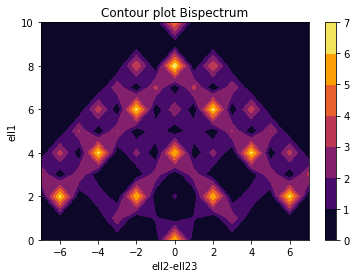

In [65]:
for i in np.arange(matrix_Bellt.size):    
    #print int(matrix_ell23t[i]-b),int(matrix_ell1t[i])
    index1 = (int(matrix_ell23t[i]-b))
    index2 = int(matrix_ell1t[i])
    Bellmatrix[index1,index2]=matrix_Bellt[i]
    #Bellmatrix[]
print Bellmatrix

cp = plt.contourf(Xarr, Yarr[::-1], Bellmatrix.T,cmap=cm.inferno )
#print Xarr.size, Bellmatrix[0,:].size
#plt.colormap()
plt.colorbar(cp)
plt.title("Contour plot Bispectrum")
plt.xlabel('ell2-ell23')
plt.ylabel('ell1')
#plt.set_zlim=(-6e-18,6e-18)
#plt.figure(figsize=(21, 10))
plt.show()


In [66]:
map1=hp.read_map("/home/karin/FLASK_2018/flask_2018/maps/test01-f1z1.fits")

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [67]:
var1 = np.var(map1)
print var1

0.5774812892325311


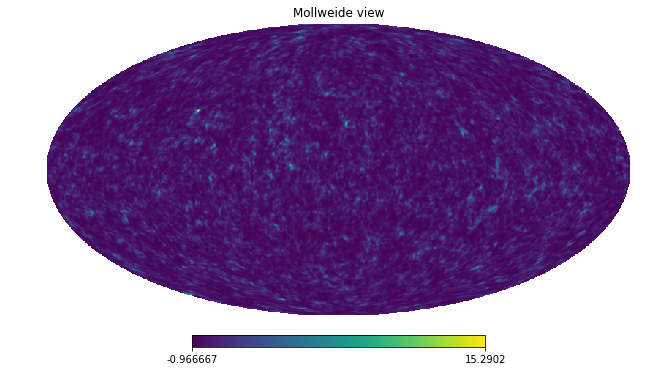

In [68]:
hp.mollview(map1)

In [69]:
alm2 = hp.map2alm(map1)

In [70]:
cl2 = hp.alm2cl(alm2)

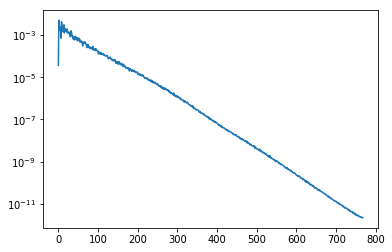

In [71]:
plt.semilogy(cl2)

In [72]:
for i in np.arange(0,np.size(cl2)):
    cl2[i] = 0.001 

In [73]:
from astropy.io import fits as pyfits
maps = np.zeros((30, hp.pixelfunc.nside2npix(nside)))
for i in range (0, 30):
    maps[i, :] = hp.sphtfunc.synfast(cl2, nside)
    
print maps
file_map = 'map_hi_channels5.fits'
pyfits.writeto(file_map, maps)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm

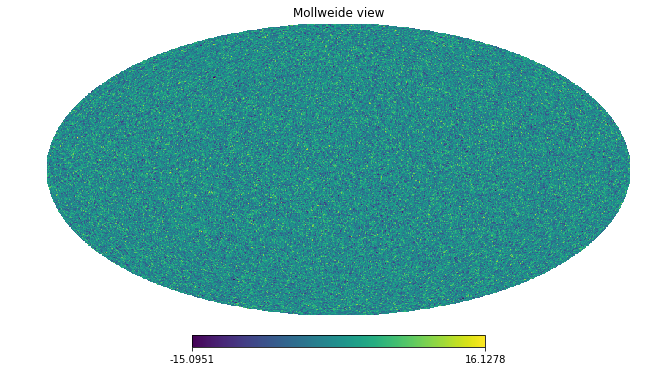

In [74]:
map = pyfits.getdata(file_map)
hp.mollview(map[1, :])
plt.show()